In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-pastel')

In [54]:
df = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx',header=1)
df.head()

C:\Program Files (x86)\ANACONDA\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0    Timestamp     449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3    MV101         449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6    AIT201        449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10   MV201         449919 non-null  int64  
 11   P201          449919 non-null  int64  
 12   P202          449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14   P204          449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

## Data Preprocessing

Which might be used during reading the data stream

In [56]:
df['Normal/Attack'].value_counts()

Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

In [57]:
df['Normal/Attack'] = df['Normal/Attack'].map({'A ttack':1,'Normal':0,'Attack':1})

In [58]:
new_col = []
for column in df.columns:
    new_col.append(column.strip())
df.columns = new_col

## Numerical data distribution

In [60]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [61]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0


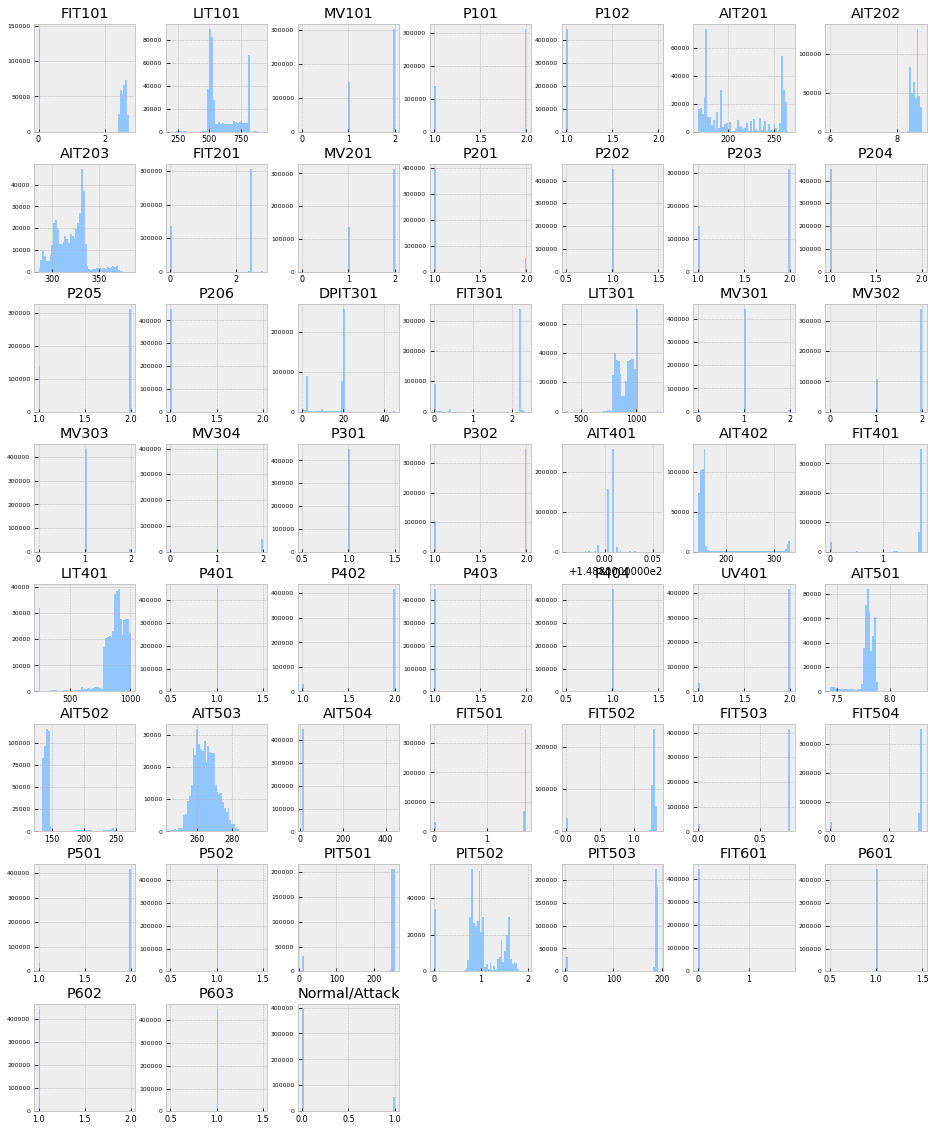

In [62]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=6); # ; avoid having the matplotlib verbose informations

From the histogram we can see that there are some columns' value never changed, which can be removed from the data frame

In [64]:
for column in df.columns:
    if len(df[column].value_counts()) == 1:
        print('Remove the column: '+column)
        df.drop(column,axis=1,inplace=True)

Remove the column: P202
Remove the column: P301
Remove the column: P401
Remove the column: P404
Remove the column: P502
Remove the column: P601
Remove the column: P603


## Show the Correlations

<AxesSubplot:>

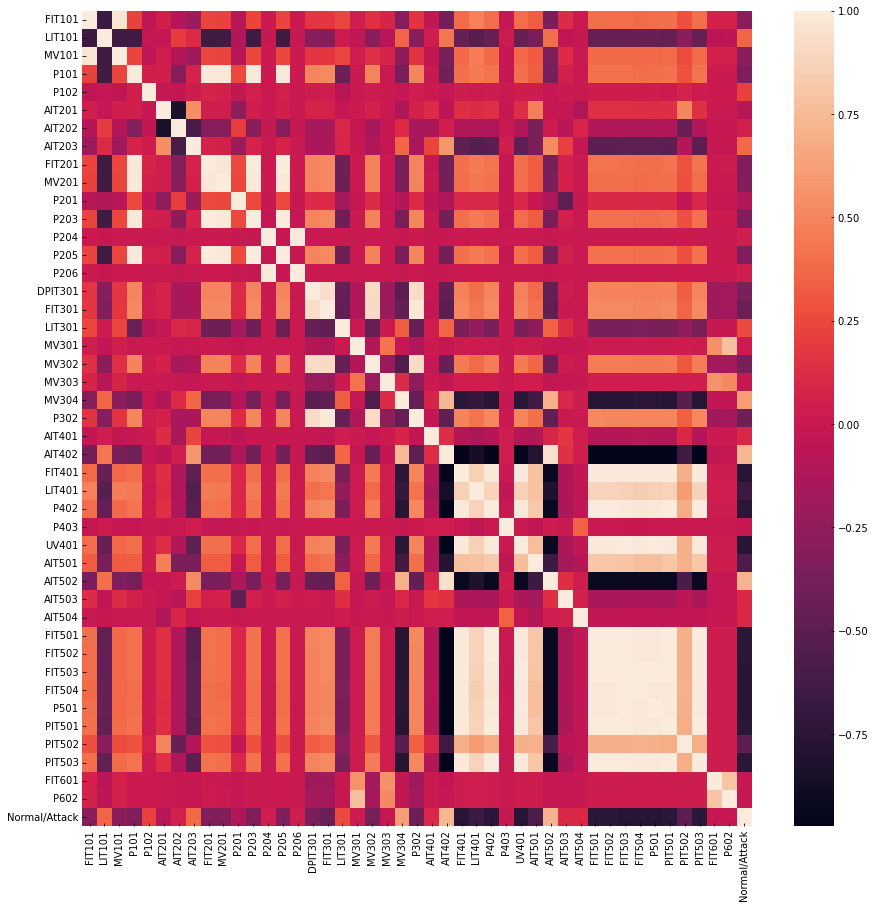

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

Remove the columns which are dependent to another column

In [78]:
# From Latifa's Data_Preparation.ipynb

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [87]:
corr_features = correlation(df[df.columns[1:-1]], 0.8) # Exclude the timestamp and label

df.drop(corr_features,axis=1,inplace=True)

Find the columns which are strongly correlated to the label but not correlated to each other

<AxesSubplot:>

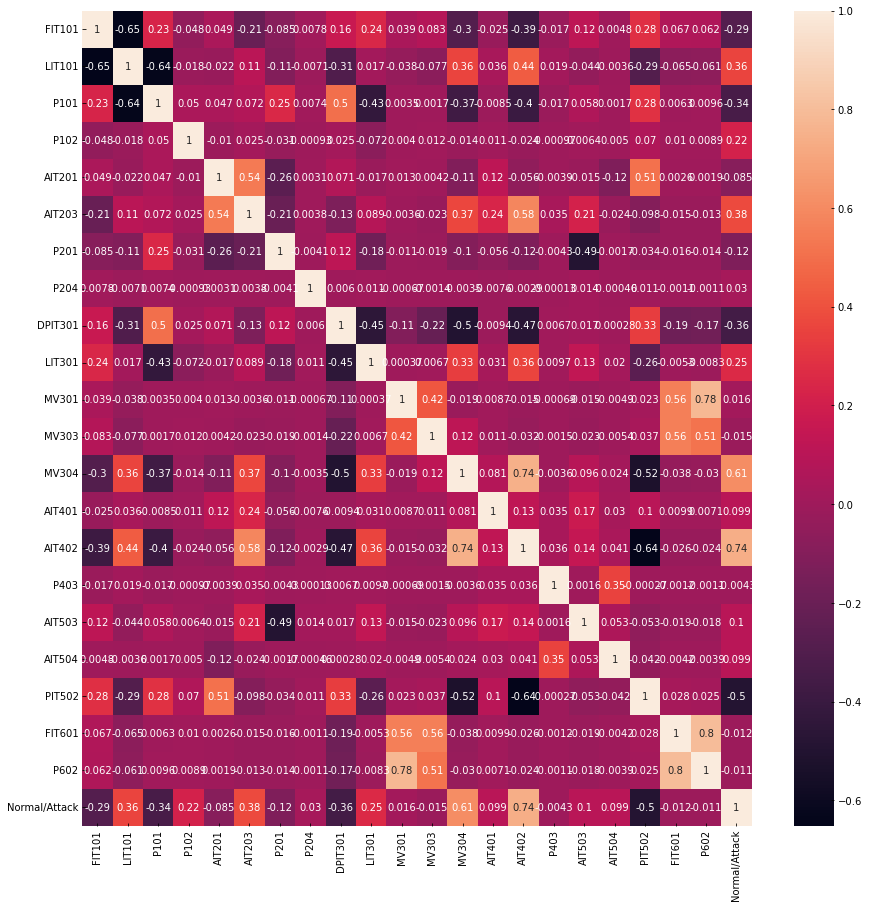

In [114]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [105]:
df_corr = df.corr()['Normal/Attack'][:-1]
golden_features = df_corr[abs(df_corr) > 0.07].sort_values(ascending=False)
print("There are {} strongly correlated values with Normal/Attack:\n{}".format(len(golden_features), golden_features))

There are 15 strongly correlated values with Normal/Attack:
AIT402     0.737683
MV304      0.609133
AIT203     0.376254
LIT101     0.357170
LIT301     0.253358
P102       0.217119
AIT503     0.102062
AIT504     0.099059
AIT401     0.098597
AIT201    -0.085324
P201      -0.122543
FIT101    -0.288920
P101      -0.340154
DPIT301   -0.356127
PIT502    -0.495360
Name: Normal/Attack, dtype: float64


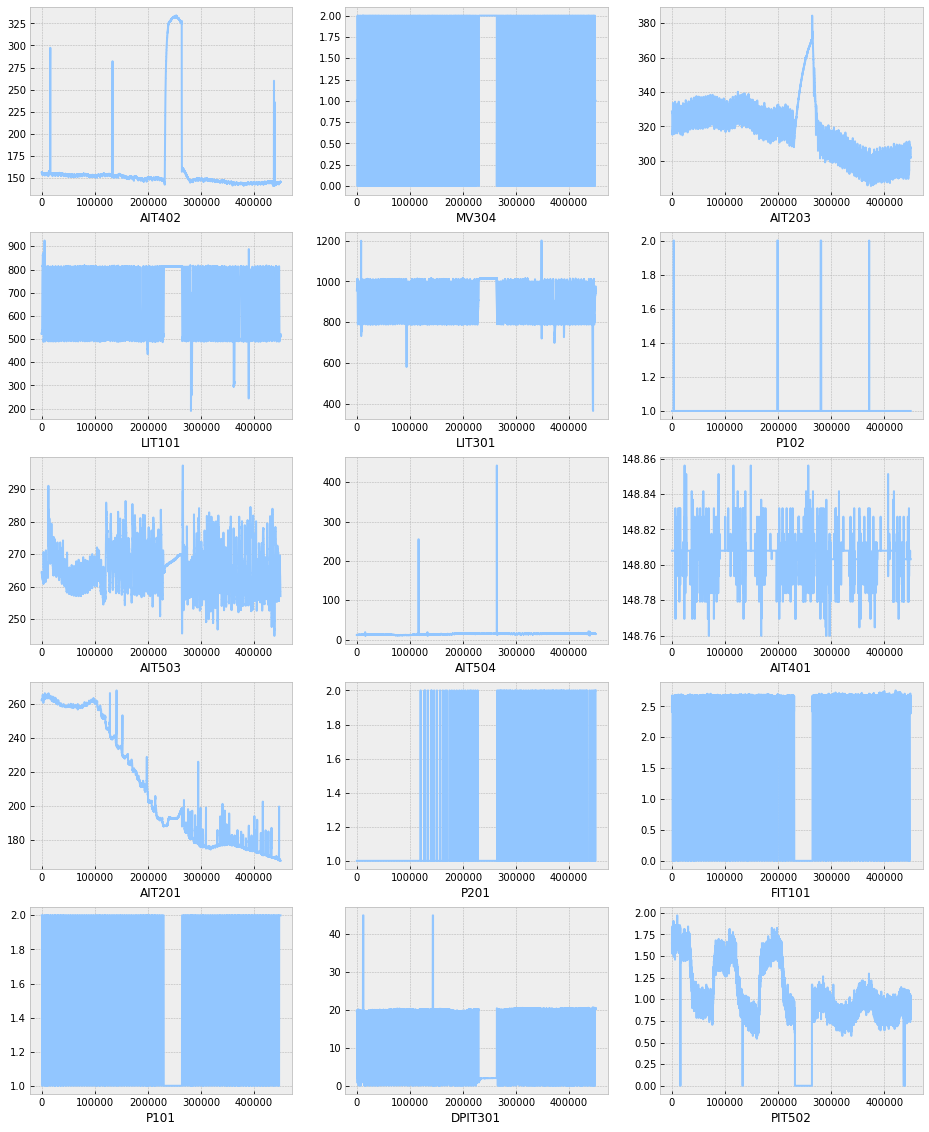

In [115]:
plt.figure(figsize=(16, 20))
for i,column in enumerate(golden_features.index):
    plt.subplot(int(len(golden_features)/3),3,i+1)
    df[column].plot()
    plt.xlabel(column)
plt.show()